In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import torch
import numpy as np

In [7]:
n=100
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)

tensor([-0.0694, -0.0483,  0.3591,  0.0649,  0.0654,  0.4049, -0.5873,  0.7445,
         0.3566, -0.9532,  0.1519,  0.0967, -0.6220,  0.7842, -0.8828, -0.7740,
         0.4316, -0.3328,  0.6351,  0.4263, -0.3829, -0.7065,  0.1616, -0.6809,
        -0.2940,  0.0595, -0.7200,  0.6411,  0.4434,  0.7609,  0.2839,  0.6213,
         0.6072, -0.2006,  0.8043,  0.3341, -0.8897,  0.4303, -0.2761,  0.8941,
         0.9071,  0.0752, -0.5385,  0.2388,  0.3580, -0.0832, -0.6428, -0.3519,
        -0.0360, -0.7517,  0.8062, -0.5497, -0.3504, -0.8315, -0.2931, -0.9085,
        -0.4660,  0.9156, -0.9127,  0.3668, -0.1132, -0.2438, -0.2316,  0.3916,
         0.8010, -0.8456,  0.1214,  0.9683, -0.9280,  0.3150,  0.2944,  0.1803,
         0.5762,  0.2909,  0.4876,  0.7760,  0.0609, -0.5170,  0.8158, -0.3120,
         0.2691, -0.2917, -0.6737,  0.0785,  0.3696, -0.5609, -0.8880,  0.4923,
         0.3482, -0.9346, -0.2373, -0.1381, -0.1001, -0.5236,  0.6165, -0.8714,
         0.3037, -0.7523, -0.5017, -0.15

In [8]:
a = torch.tensor([3.,2]) # y = 3x+2
y = x@a + 0.25*torch.randn(n)

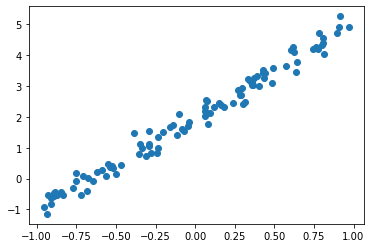

In [9]:
plt.scatter(x[:,0], y);

## Gradient Descent

In [10]:
w = torch.nn.Parameter(torch.tensor([-1., 1.]))
w

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [11]:
def mse(yp, y): 
    return ((yp-y)**2).mean()

In [13]:
yp = x@w
mse(yp, y)

tensor(5.7729, grad_fn=<MeanBackward0>)

In [18]:
def minimize_loss(i):
    yp = x@w
    loss = mse(yp, y)
    if t % 10 == 0: print(i, loss)
    loss.backward()
    with torch.no_grad():
        w.sub_(lr * w.grad) # w = w - lr * w.grad
        w.grad.zero_()

In [19]:
lr = 1e-1
for t in range(100): minimize_loss(t)

0 tensor(5.7729, grad_fn=<MeanBackward0>)
10 tensor(1.4727, grad_fn=<MeanBackward0>)
20 tensor(0.4541, grad_fn=<MeanBackward0>)
30 tensor(0.1670, grad_fn=<MeanBackward0>)
40 tensor(0.0854, grad_fn=<MeanBackward0>)
50 tensor(0.0623, grad_fn=<MeanBackward0>)
60 tensor(0.0557, grad_fn=<MeanBackward0>)
70 tensor(0.0538, grad_fn=<MeanBackward0>)
80 tensor(0.0533, grad_fn=<MeanBackward0>)
90 tensor(0.0531, grad_fn=<MeanBackward0>)


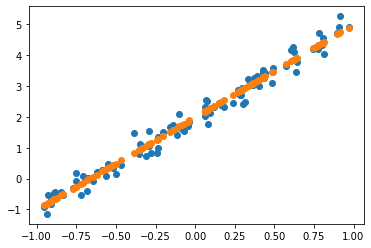

In [21]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@w.detach());

In [22]:
w

Parameter containing:
tensor([2.9992, 1.9934], requires_grad=True)

* Loss function
* Learning rate
* Epoch
* iteration
* Minibatch
* SGD